<a href="https://colab.research.google.com/github/georginobaltazar/TP-547---Trabalhos/blob/main/Trabalho%20Final%20III/EstudoDeCasoTP547.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estudo de Caso: Georgino, Eylen e Fábio



Seja um sistema com 2 servidores enumerados S1 e S2 com uma fila única de buffer finito de tamanho J. A chegada das mensagens obedece a uma distribuição Poissoniana de média λ e as durações de serviço têm distribuições genéricas com médias 1/μ1  e 1/μ2. A mensagem é sempre encaminhada inicialmente ao servidor S1. Se S1 estiver ocupado a mensagem é então encaminhada ao servidor S2 . Fazer uma análise deste sistema comparando com outras lógicas de escolha dos servidores e de  taxas de serviço. Considerar diferentes tamanhos de filas e distribuições para os tempos de serviço.

### Sistema de Fila M/M/2/J/J+2/∞/FCFS

In [20]:
import numpy as np

def simulate_queue(lambda_, mu1, mu2, J, num_iterations=500000):
    # Estado inicial do sistema
    elemento_Fila = 0  # número de elementos na fila
    elemento_servidor1 = 0  # número de elementos no servidor 1
    elemento_servidor2 = 0  # número de elementos no servidor 2
    total_blocked = 0  # Contador de bloqueio
    total_elements_in_queue = 0  # Total de elementos na fila
    total_elements_in_system = 0  # Total de elementos no sistema
    total_served = 0  # Número de partidas
    n = 0  # Número de pacotes que chegam

    # Tempo inicial
    t = 0

    # Inicializar tempos de chegada e partida
    tc = np.random.exponential(1 / lambda_)                 # tempo para a próxima chegada
    tp1 = np.infty                                          # inicializa o tempo de partida do servidor 1 como infinito
    tp2 = np.infty                                          # inicializa o tempo de partida do servidor 2 como infinito

    while total_served < num_iterations:
                                                            # Verifica qual o próximo evento (chegada ou partida)
        if tc < min(tp1, tp2):
            # Ocorre uma chegada
            t = tc                                          # atualiza o tempo atual para o tempo de chegada
            n += 1                                          # incrementa o número de pacotes que chegam
            if elemento_servidor1 == 0:
                # Se o servidor 1 está desocupado
                elemento_servidor1 = 1                       # ocupa o servidor 1
                tp1 = t + np.random.exponential(1 / mu1)     # define o tempo de partida do servidor 1
            elif elemento_servidor2 == 0:
                # Se o servidor 2 está desocupado
                elemento_servidor2 = 1                       # ocupa o servidor 2
                tp2 = t + np.random.exponential(1 / mu2)     # define o tempo de partida do servidor 2
            elif elemento_Fila < J:
                                                             # Se ambos os servidores estão ocupados e a fila não está cheia
                elemento_Fila += 1                           # incrementa o número de elementos na fila
                total_elements_in_queue += 1                 # incrementa o total de elementos que entraram na fila
            else:
                # Se a fila está cheia
                total_blocked += 1                           # incrementa o contador de bloqueio

            # Gera nova chegada
            tc = t + np.random.exponential(1 / lambda_)      # define o tempo da próxima chegada
        elif tp1 < tp2:
            # Ocorre uma partida no servidor 1
            t = tp1                                          # atualiza o tempo atual para o tempo de partida do servidor 1
            total_served += 1                                # incrementa o número de partidas
            if elemento_Fila > 0:
                # Se há elementos na fila
                elemento_Fila -= 1                           # decrementa o número de elementos na fila
                tp1 = t + np.random.exponential(1 / mu1)     # define o tempo da próxima partida do servidor 1
            else:
                                                             # Se não há elementos na fila
                elemento_servidor1 = 0                       # libera o servidor 1
                tp1 = np.infty                               # define o tempo de partida do servidor 1 como infinito
        else:
            # Ocorre uma partida no servidor 2
            t = tp2                                          # atualiza o tempo atual para o tempo de partida do servidor 2
            total_served += 1                                # incrementa o número de partidas
            if elemento_Fila > 0:
                                                             # Se há elementos na fila
                elemento_Fila -= 1                           # decrementa o número de elementos na fila
                tp2 = t + np.random.exponential(1 / mu2)     # define o tempo da próxima partida do servidor 2
            else:
                                                             # Se não há elementos na fila
                elemento_servidor2 = 0                       # libera o servidor 2
                tp2 = np.infty                               # define o tempo de partida do servidor 2 como infinito

        # Atualiza contadores de elementos no sistema
        total_elements_in_system += elemento_servidor1 + elemento_servidor2 + elemento_Fila

    # Cálculo das métricas de desempenho
    P_blocking = total_blocked / n                 # probabilidade de bloqueio
    Lq = total_elements_in_queue / num_iterations  # número médio de elementos na fila
    L = total_elements_in_system / num_iterations  # número médio de elementos no sistema
    Wq = Lq /lambda_                               # tempo médio na fila
    W = L / lambda_                                # tempo médio no sistema
    rho = lambda_ / (mu1 + mu2)                    # fator de utilização

    return {
        'P_blocking': P_blocking,
        'Lq': Lq,
        'L': L,
        'Wq': Wq,
        'W': W,
        'rho': rho
    }

# Parâmetros fixos
lambda_ = 10
mu1 = 10
mu2 = 8
buffer_sizes = [1, 2, 5, 10]

# Calculando as métricas de desempenho para diferentes tamanhos de buffer
for J in buffer_sizes:
    result = simulate_queue(lambda_, mu1, mu2, J)
    print(f"Buffer Size (J) = {J}")
    print(f"Probabilidade de Bloqueio (Pb): {result['P_blocking']}")
    print(f"Número Médio de Elementos no Sistema (L): {result['L']}")
    print(f"Número Médio de Elementos na Fila (Lq): {result['Lq']}")
    print(f"Tempo Médio no Sistema (W): {result['W']}")
    print(f"Tempo Médio na Fila (Wq): {result['Wq']}")
    print(f"Fator de Utilização (ρ): {result['rho']}")
    print("\n")


Buffer Size (J) = 1
Probabilidade de Bloqueio (Pb): 0.11017283968194082
Número Médio de Elementos no Sistema (L): 3.070288
Número Médio de Elementos na Fila (Lq): 0.224298
Tempo Médio no Sistema (W): 0.2732025652398613
Tempo Médio na Fila (Wq): 0.019958645240502004
Fator de Utilização (ρ): 0.5555555555555556


Buffer Size (J) = 2
Probabilidade de Bloqueio (Pb): 0.05790659727848602
Número Médio de Elementos no Sistema (L): 3.410138
Número Médio de Elementos na Fila (Lq): 0.307968
Tempo Médio no Sistema (W): 0.32126685121699383
Tempo Médio na Fila (Wq): 0.029013462104933923
Fator de Utilização (ρ): 0.5555555555555556


Buffer Size (J) = 5
Probabilidade de Bloqueio (Pb): 0.009534185790834267
Número Médio de Elementos no Sistema (L): 3.9653
Número Médio de Elementos na Fila (Lq): 0.380248
Tempo Médio no Sistema (W): 0.39274940930836044
Tempo Médio na Fila (Wq): 0.03766226449214068
Fator de Utilização (ρ): 0.5555555555555556


Buffer Size (J) = 10
Probabilidade de Bloqueio (Pb): 0.000431812

Plotando os Resultados

In [ ]:
import matplotlib.pyplot as plt

# Parâmetros fixos para três configurações
configurations = [
    {'lambda_': 10, 'mu1': 10, 'mu2': 10, 'label': 'λ=10, μ1=10, μ2=10'},
    {'lambda_': 10, 'mu1': 10, 'mu2': 8, 'label': 'λ=10, μ1=10, μ2=8'},
    {'lambda_': 20, 'mu1': 10, 'mu2': 10, 'label': 'λ=20, μ1=10, μ2=10'}
]

buffer_sizes = [1, 2, 5, 10]

# Inicializando dicionários para armazenar os resultados
results = {config['label']: {'P_blocking': [], 'L': [], 'Lq': [], 'W': [], 'Wq': []} for config in configurations}

# Calculando as métricas de desempenho para diferentes configurações e tamanhos de buffer
for config in configurations:
    for J in buffer_sizes:
        result = simulate_queue(config['lambda_'], config['mu1'], config['mu2'], J)
        results[config['label']]['P_blocking'].append(result['P_blocking'])
        results[config['label']]['L'].append(result['L'])
        results[config['label']]['Lq'].append(result['Lq'])
        results[config['label']]['W'].append(result['W'])
        results[config['label']]['Wq'].append(result['Wq'])

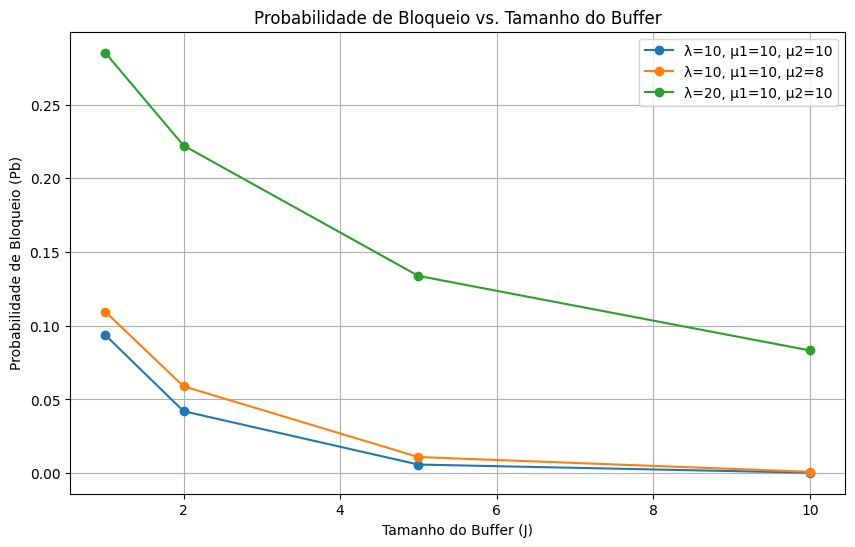

In [ ]:
# Plotando a Probabilidade de Bloqueio
plt.figure(figsize=(10, 6))
for label, data in results.items():
    plt.plot(buffer_sizes, data['P_blocking'], marker='o', linestyle='-', label=label)
plt.title('Probabilidade de Bloqueio vs. Tamanho do Buffer')
plt.xlabel('Tamanho do Buffer (J)')
plt.ylabel('Probabilidade de Bloqueio (Pb)')
plt.legend()
plt.grid(True)
plt.show()

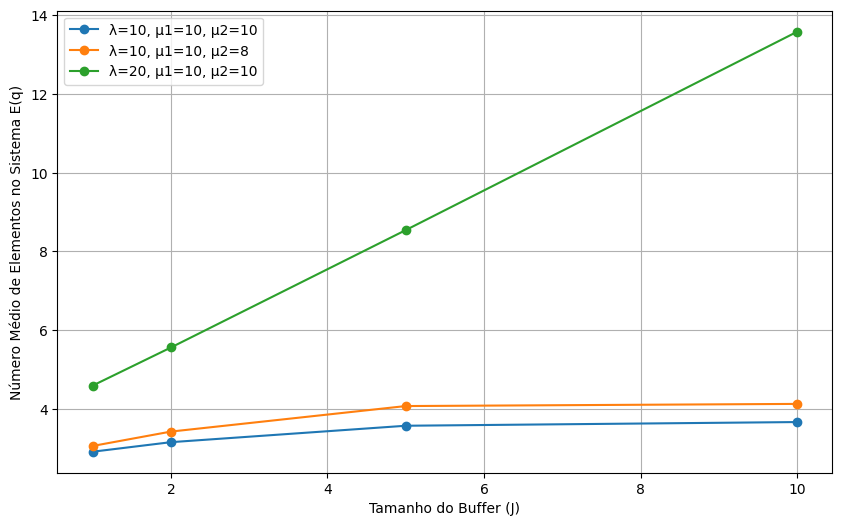

In [ ]:
# Plotando o Número Médio de Elementos no Sistema
plt.figure(figsize=(10, 6))
for label, data in results.items():
    plt.plot(buffer_sizes, data['L'], marker='o', linestyle='-', label=label)
#plt.title('Número Médio de Elementos no Sistema E(q) vs. Tamanho do Buffer')
plt.xlabel('Tamanho do Buffer (J)')
plt.ylabel('Número Médio de Elementos no Sistema E(q)')
plt.legend()
plt.grid(True)
plt.show()

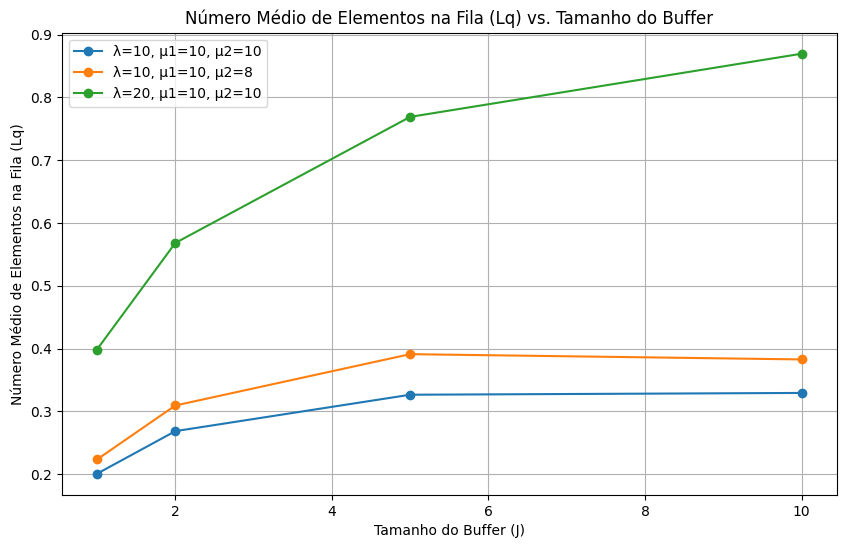

In [ ]:
# Plotando o Número Médio de Elementos na Fila
plt.figure(figsize=(10, 6))
for label, data in results.items():
    plt.plot(buffer_sizes, data['Lq'], marker='o', linestyle='-', label=label)
plt.title('Número Médio de Elementos na Fila (Lq) vs. Tamanho do Buffer')
plt.xlabel('Tamanho do Buffer (J)')
plt.ylabel('Número Médio de Elementos na Fila E(w)')
plt.legend()
plt.grid(True)
plt.show()

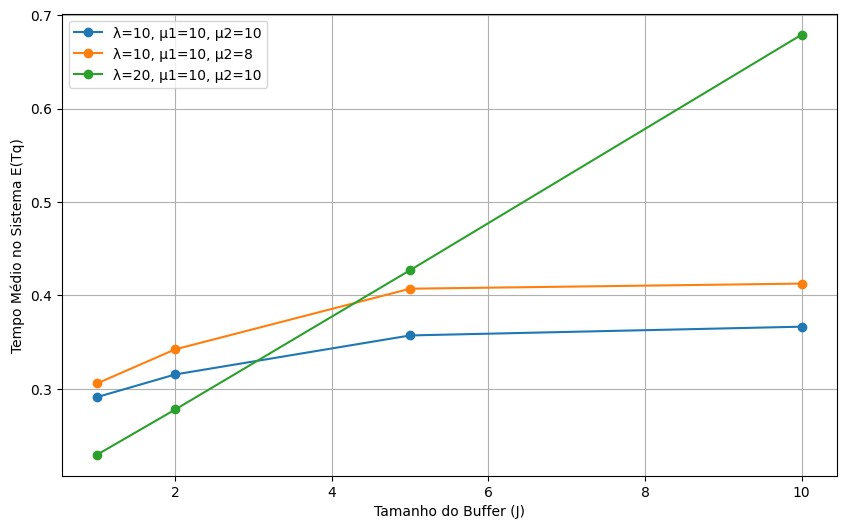

In [ ]:
# Plotando o Tempo Médio no Sistema
plt.figure(figsize=(10, 6))
for label, data in results.items():
    plt.plot(buffer_sizes, data['W'], marker='o', linestyle='-', label=label)
#plt.title('Tempo Médio no Sistema (W) vs. Tamanho do Buffer')
plt.xlabel('Tamanho do Buffer (J)')
plt.ylabel('Tempo Médio no Sistema E(Tq)')
plt.legend()
plt.grid(True)
plt.show()

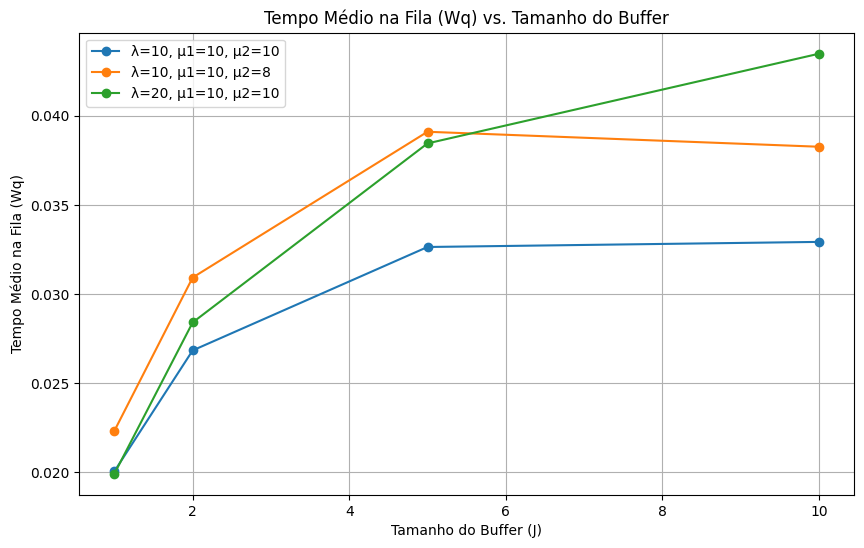

In [ ]:
# Plotando o Tempo Médio na Fila
plt.figure(figsize=(10, 6))
for label, data in results.items():
    plt.plot(buffer_sizes, data['Wq'], marker='o', linestyle='-', label=label)
plt.title('Tempo Médio na Fila (Wq) vs. Tamanho do Buffer')
plt.xlabel('Tamanho do Buffer (J)')
plt.ylabel('Tempo Médio na Fila (Wq)')
plt.legend()
plt.grid(True)
plt.show()